In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM,Activation, Dense, Dropout, Input,Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline 
import csv
with open('/spam.csv', 'r') as csvfile: reader = csv.reader(csvfile)
df = pd.read_csv(r'/spam.csv',encoding='latin-1') 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


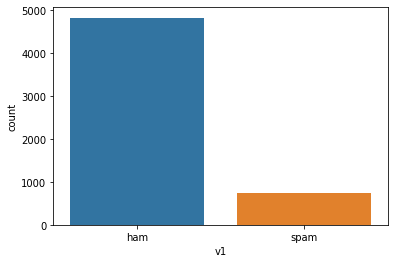

In [23]:
sns.countplot(df.v1)

In [18]:
df.groupby(['v1']).size()

v1
ham     4825
spam     747
dtype: int64

In [19]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [20]:
inputs = Input(name='InputLayer',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,name='FullyConnectedLayer1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1,name='OutputLayer')(layer)
layer = Activation('sigmoid')(layer)

In [21]:
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 FullyConnectedLayer1 (Dense  (None, 256)              16640     
 )                                                               
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                           

In [22]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 14s 310ms/step - loss: 0.3430 - accuracy: 0.8669 - val_loss: 0.1352 - val_accuracy: 0.9568
Epoch 2/10
30/30 [==============================] - 8s 265ms/step - loss: 0.0868 - accuracy: 0.9768 - val_loss: 0.0549 - val_accuracy: 0.9842
Epoch 3/10
30/30 [==============================] - 9s 316ms/step - loss: 0.0450 - accuracy: 0.9868 - val_loss: 0.0514 - val_accuracy: 0.9831
Epoch 4/10
30/30 [==============================] - 8s 265ms/step - loss: 0.0345 - accuracy: 0.9902 - val_loss: 0.0350 - val_accuracy: 0.9873
Epoch 5/10
30/30 [==============================] - 8s 254ms/step - loss: 0.0256 - accuracy: 0.9902 - val_loss: 0.0369 - val_accuracy: 0.9884
Epoch 6/10
30/30 [==============================] - 8s 254ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0421 - val_accuracy: 0.9873
Epoch 7/10
30/30 [==============================] - 8s 259ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0466 - val_accuracy: 0.9895
Epoch

In [24]:
model.save("model_1")

In [25]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix =sequence.pad_sequences(test_sequences,maxlen=max_len)
accuracy = model.evaluate(test_sequences_matrix,Y_test)
print('Accuracy: {:0.3f}'.format(accuracy[1]))

27/27 [==============================] - 1s 51ms/step - loss: 0.1124 - accuracy: 0.9868
Accuracy: 0.987
